# Analysis of COVID-19 medical dataset

In [12]:
from question_answering.paths import extractive_qa_paths
from question_answering.utils import core_qa_utils
from transformers import AutoTokenizer

In [13]:
raw_dataset = core_qa_utils.load_datasets_from_json(
    dataset_path=extractive_qa_paths.medical_dataset_dir,
    filenames=["original_medical.json"],
)[0]
raw_dataset = raw_dataset.shuffle(seed=42)

In [14]:
raw_dataset

Dataset({
    features: ['document_id', 'context', 'question', 'is_impossible', 'id', 'answers', 'answer_text', 'answer_start'],
    num_rows: 2019
})

# How do the raw samples look like?

In [15]:
first_sample = raw_dataset[0]

In [16]:
question = first_sample["question"]
print(f"Question: {question}")

Question: What ion channel is essential for 3a-mediated IL-1Beta secretion?


In [17]:
context = first_sample["context"]
context_char_len = len(context)
context_word_len = len(context.split())

print(f"Context: {context}\n")
print(f"Context char length: {context_char_len}")
print(f"Context words length: {context_word_len}")

Context: Severe Acute Respiratory Syndrome Coronavirus Viroporin 3a Activates the NLRP3 Inflammasome

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6361828/

SHA: f02d0c1e8b0109648e578662dc250abe349a033c

Authors: Chen, I-Yin; Moriyama, Miyu; Chang, Ming-Fu; Ichinohe, Takeshi
Date: 2019-01-29
DOI: 10.3389/fmicb.2019.00050
License: cc-by

Abstract: Nod-like receptor family, pyrin domain-containing 3 (NLRP3) regulates the secretion of proinflammatory cytokines interleukin 1 beta (IL-1β) and IL-18. We previously showed that influenza virus M2 or encephalomyocarditis virus (EMCV) 2B proteins stimulate IL-1β secretion following activation of the NLRP3 inflammasome. However, the mechanism by which severe acute respiratory syndrome coronavirus (SARS-CoV) activates the NLRP3 inflammasome remains unknown. Here, we provide direct evidence that SARS-CoV 3a protein activates the NLRP3 inflammasome in lipopolysaccharide-primed macrophages. SARS-CoV 3a was sufficient to cause the NLRP3 inflammasome a

# Do all samples follow the structure of {trash, abstract, text}

In [18]:
unstructured_samples = raw_dataset.filter(
    lambda sample: "Text: " not in sample["context"]
)
len(unstructured_samples)

Filter:   0%|          | 0/2019 [00:00<?, ? examples/s]

146

In [19]:
print(unstructured_samples[0]["context"])

Estimating the number of infections and the impact of non-
pharmaceutical interventions on COVID-19 in 11 European countries

30 March 2020 Imperial College COVID-19 Response Team

Seth Flaxmani Swapnil Mishra*, Axel Gandy*, H JulietteT Unwin, Helen Coupland, Thomas A Mellan, Harrison
Zhu, Tresnia Berah, Jeffrey W Eaton, Pablo N P Guzman, Nora Schmit, Lucia Cilloni, Kylie E C Ainslie, Marc
Baguelin, Isobel Blake, Adhiratha Boonyasiri, Olivia Boyd, Lorenzo Cattarino, Constanze Ciavarella, Laura Cooper,
Zulma Cucunuba’, Gina Cuomo—Dannenburg, Amy Dighe, Bimandra Djaafara, Ilaria Dorigatti, Sabine van Elsland,
Rich FitzJohn, Han Fu, Katy Gaythorpe, Lily Geidelberg, Nicholas Grassly, Wi|| Green, Timothy Hallett, Arran
Hamlet, Wes Hinsley, Ben Jeffrey, David Jorgensen, Edward Knock, Daniel Laydon, Gemma Nedjati—Gilani, Pierre
Nouvellet, Kris Parag, Igor Siveroni, Hayley Thompson, Robert Verity, Erik Volz, Caroline Walters, Haowei Wang,
Yuanrong Wang, Oliver Watson, Peter Winskill, Xiaoyue X

In [20]:
answer = first_sample["answer_text"][0]
answer_char_len = len(answer)
answer_words_len = len(answer.split())

print(f"Answer: {answer}")
print(f"Answer char length: {answer_char_len}")
print(f"Answer words length: {answer_words_len}")

Answer: ion channel activity of the 3a protein
Answer char length: 38
Answer words length: 7


In [21]:
print(
    f"Can all questions be answered: {all([sample['is_impossible'] == 0 for sample in raw_dataset])}"
)

Can all questions be answered: True


# How long are the texts?

In [22]:
def get_max_num_of_words(sentences: list[str]):
    return len(max([sentence.split() for sentence in sentences], key=len))


def get_min_num_of_words(sentences: list[str]):
    return len(min([sentence.split() for sentence in sentences], key=len))

In [23]:
print(
    f"Max word length of questions in train set: {get_max_num_of_words(raw_dataset['question'])}"
)
print(
    f"Max word length of questions in val set: {get_max_num_of_words(raw_dataset['question'])}"
)
print(
    f"Max word length of questions in test set: {get_max_num_of_words(raw_dataset['question'])}"
)

print("--------------------------")

print(
    f"Max word length of contexts in train set: {get_max_num_of_words(raw_dataset['context'])}"
)
print(
    f"Max word length of contexts in val set: {get_max_num_of_words(raw_dataset['context'])}"
)
print(
    f"Max word length of contexts in test set: {get_max_num_of_words(raw_dataset['context'])}"
)

print("--------------------------")

print(
    f"Min word length of questions in train set: {get_min_num_of_words(raw_dataset['question'])}"
)
print(
    f"Min word length of questions in val set: {get_min_num_of_words(raw_dataset['question'])}"
)
print(
    f"Min word length of questions in test set: {get_min_num_of_words(raw_dataset['question'])}"
)

print("--------------------------")

print(
    f"Min word length of contexts in train set: {get_min_num_of_words(raw_dataset['context'])}"
)
print(
    f"Min word length of contexts in val set: {get_min_num_of_words(raw_dataset['context'])}"
)
print(
    f"Min word length of contexts in test set: {get_min_num_of_words(raw_dataset['context'])}"
)

Max word length of questions in train set: 28
Max word length of questions in val set: 28
Max word length of questions in test set: 28
--------------------------
Max word length of contexts in train set: 11368
Max word length of contexts in val set: 11368
Max word length of contexts in test set: 11368
--------------------------
Min word length of questions in train set: 3
Min word length of questions in val set: 3
Min word length of questions in test set: 3
--------------------------
Min word length of contexts in train set: 415
Min word length of contexts in val set: 415
Min word length of contexts in test set: 415


Seems like there is a limit of words after which the context is cut off

In [24]:
def find_samples_with_word_count(dataset, num_words: int, key: str = "context"):
    return dataset.filter(lambda sample: len(sample[key].split()) == num_words)

In [25]:
max_length_samples = find_samples_with_word_count(raw_dataset, num_words=11368)
min_length_samples = find_samples_with_word_count(raw_dataset, num_words=415)

Filter:   0%|          | 0/2019 [00:00<?, ? examples/s]

Filter:   0%|          | 0/2019 [00:00<?, ? examples/s]

In [26]:
max_length_samples

Dataset({
    features: ['document_id', 'context', 'question', 'is_impossible', 'id', 'answers', 'answer_text', 'answer_start'],
    num_rows: 119
})

In [27]:
print(min_length_samples[0]["context"])

Note from the editors: novel coronavirus (2019-nCoV)

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6988271/

SHA: d958168df85240e544a918d843a14e887dc41d2b

Authors: nan
Date: 2020-01-23
DOI: 10.2807/1560-7917.es.2020.25.3.2001231
License: cc-by

Abstract: nan

Text: The situation has continued to evolve rapidly since then and just a few weeks later, as at 23 January, 614 laboratory-confirmed cases and 17 deaths have been reported [2] including some cases detected outside mainland China [3] . Meanwhile, on 7 January 2020, the novel coronavirus, currently named 2019-nCoV, was officially announced as the causative agent by Chinese authorities [3] . In order to support public health action, viral genome sequences were released by Chinese researchers on 10 January [4] and 2 days later, four further sequences were also made available on the Global Initiative on Sharing All Influenza Data (GISAID) (https://www.gisaid.org/). While more cases are being reported on a daily basis and there is evi

In [28]:
print(f"How many: {len(max_length_samples)}")

How many: 119


In [29]:
some_cut_off_context = max_length_samples[82]
print(some_cut_off_context["context"])

MERS coronavirus: diagnostics, epidemiology and transmission

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC4687373/

SHA: f6fcf1a99cbd073c5821d1c4ffa3f2c6daf8ae29

Authors: Mackay, Ian M.; Arden, Katherine E.
Date: 2015-12-22
DOI: 10.1186/s12985-015-0439-5
License: cc-by

Abstract: The first known cases of Middle East respiratory syndrome (MERS), associated with infection by a novel coronavirus (CoV), occurred in 2012 in Jordan but were reported retrospectively. The case first to be publicly reported was from Jeddah, in the Kingdom of Saudi Arabia (KSA). Since then, MERS-CoV sequences have been found in a bat and in many dromedary camels (DC). MERS-CoV is enzootic in DC across the Arabian Peninsula and in parts of Africa, causing mild upper respiratory tract illness in its camel reservoir and sporadic, but relatively rare human infections. Precisely how virus transmits to humans remains unknown but close and lengthy exposure appears to be a requirement. The KSA is the focal point of ME

In [30]:
max_length_samples["context"][21] == max_length_samples["context"][37]

True

It is all the same context -> In this dataset there are the same contexts that repeat with varying questions and answers. Therefore, the number of contexts to take into account in normalization is limited and perhaps manageable

In [31]:
# How many differing contexts are there?
differing_contexts = []
all_contexts = [item for item in raw_dataset["context"]]

for context in all_contexts:
    if context not in differing_contexts:
        differing_contexts.append(context)

In [32]:
print(f"Total contexts: {len(all_contexts)}")
print(f"Total differing contexts: {len(differing_contexts)}")

Total contexts: 2019
Total differing contexts: 147


147 contexts perhaps is a number that we can work with (still hard)

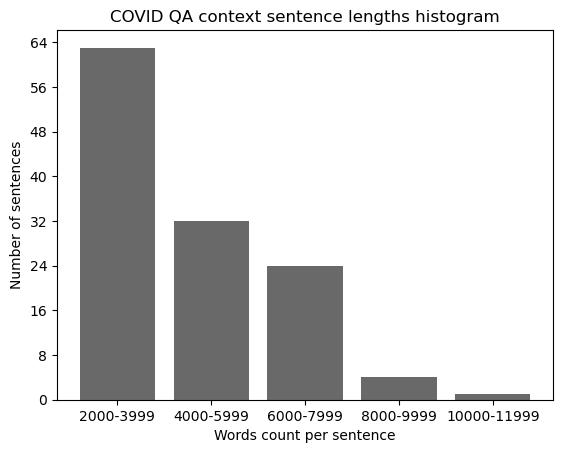

In [35]:
core_qa_utils.plot_sentence_lengths_histogram(
    sentences=differing_contexts,
    figure_path=extractive_qa_paths.general_figures_dir / "medical_context_sentence_lengths_histogram_1000_12000_2000.png",
    figure_title="COVID QA context sentence lengths histogram",
    min_threshold=1000,
    max_threshold=12000,
    divider=2000,
)

In [34]:
print(differing_contexts[0])

Severe Acute Respiratory Syndrome Coronavirus Viroporin 3a Activates the NLRP3 Inflammasome

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC6361828/

SHA: f02d0c1e8b0109648e578662dc250abe349a033c

Authors: Chen, I-Yin; Moriyama, Miyu; Chang, Ming-Fu; Ichinohe, Takeshi
Date: 2019-01-29
DOI: 10.3389/fmicb.2019.00050
License: cc-by

Abstract: Nod-like receptor family, pyrin domain-containing 3 (NLRP3) regulates the secretion of proinflammatory cytokines interleukin 1 beta (IL-1β) and IL-18. We previously showed that influenza virus M2 or encephalomyocarditis virus (EMCV) 2B proteins stimulate IL-1β secretion following activation of the NLRP3 inflammasome. However, the mechanism by which severe acute respiratory syndrome coronavirus (SARS-CoV) activates the NLRP3 inflammasome remains unknown. Here, we provide direct evidence that SARS-CoV 3a protein activates the NLRP3 inflammasome in lipopolysaccharide-primed macrophages. SARS-CoV 3a was sufficient to cause the NLRP3 inflammasome activation

In [23]:
# Now find how many differing contexts follow the trash, abstract, text pattern
unstructured_contexts = []
structured_contexts = []

for context in differing_contexts:
    if "\n\nText: " in context:
        structured_contexts.append(context)
    else:
        unstructured_contexts.append(context)

In [24]:
print(f"Number of unstructured contexts: {len(unstructured_contexts)}")
print(f"Number of structured contexts: {len(structured_contexts)}")
print(f"Number of differing contexts: {len(differing_contexts)}")

Number of unstructured contexts: 6
Number of structured contexts: 141
Number of differing contexts: 147


#### Structured contexts analysis

In [85]:
train_dataset.filter(lambda sample: sample["context"] == structured_contexts[131])

Filter:   0%|          | 0/1413 [00:00<?, ? examples/s]

Dataset({
    features: ['index', 'context', 'question', 'is_impossible', 'id', 'answer_text', 'answer_start'],
    num_rows: 2
})

In [87]:
print(structured_contexts[140])

The influenza pandemic preparedness planning tool InfluSim

https://www.ncbi.nlm.nih.gov/pmc/articles/PMC1832202/

SHA: f3f471d10a36a7a28e9050c10bd4dfd680cba17b

Authors: Eichner, Martin; Schwehm, Markus; Duerr, Hans-Peter; Brockmann, Stefan O
Date: 2007-03-13
DOI: 10.1186/1471-2334-7-17
License: cc-by

Abstract: BACKGROUND: Planning public health responses against pandemic influenza relies on predictive models by which the impact of different intervention strategies can be evaluated. Research has to date rather focused on producing predictions for certain localities or under specific conditions, than on designing a publicly available planning tool which can be applied by public health administrations. Here, we provide such a tool which is reproducible by an explicitly formulated structure and designed to operate with an optimal combination of the competing requirements of precision, realism and generality. RESULTS: InfluSim is a deterministic compartment model based on a system of ove

Structured contexts that are weird: 7, 11, 13, 17, 20?, 22, 24?, 33, 35, 44, 60, 80, 91?!, 99, 101, 115, 118, 130, 131, 136, 140
Contexts to throw out: 91, 

#### Unstructured contexts analysis

In [107]:
print(unstructured_contexts[5])

Preparation for Possible Sustained Transmission of 2019 Novel Coronavirus
Lessons From Previous Epidemics
https://jamanetwork.com/journals/jama/fullarticle/2761285
February 11, 2020
David L. Swerdlow, MD1; Lyn Finelli, DrPH, MS2
Author Affiliations Article Information
JAMA. 2020;323(12):1129-1130. doi:10.1001/jama.2020.1960
COVID-19 Resource Center
related articles icon Related
Articles
author interview icon Interviews
Audio Interview (25:53)
COVID-19 Update From China
Transmissibility and severity are the 2 most critical factors that determine the effect of an epidemic. Neither the 2009 pandemic influenza A(H1N1) virus ([H1N1]pdm09) pandemic or the severe acute respiratory syndrome coronavirus (SARS-CoV) or the Middle East respiratory syndrome coronavirus (MERS-CoV) epidemics had the combination of both high transmissibility and severity. Control strategies are driven by this combination. R0, the basic reproduction number, is a commonly used measure of transmissibility and is defined 

## Check if any answer is not in context

## Processing and normalization
Theoretically this problem could be problematic, because after text normalization the start position of the answer might change.
A possible solution could be to try to find if the answer text appears in text context only once or more. If some samples contain this text more than once, then for each sample we should keep information about the number of the answer's occurrence in the context. After the process of normalizing both question and context, we should find the start position of the answer in the context based on the previously acquired info.

Seems like all the texts are divided into paragraphs. We could find the paragraph in which the answer to the question occurs and pass only that paragraph as a context to the model (or 3 closest paragraphs etc.)

## How to normalize text:
* remove links/urls
* remove references ([])
* remove punctuation
* lowercase

In [38]:
example_text = unstructured_contexts[0]

In [39]:
print(example_text)

Estimating the number of infections and the impact of non-
pharmaceutical interventions on COVID-19 in 11 European countries

30 March 2020 Imperial College COVID-19 Response Team

Seth Flaxmani Swapnil Mishra*, Axel Gandy*, H JulietteT Unwin, Helen Coupland, Thomas A Mellan, Harrison
Zhu, Tresnia Berah, Jeffrey W Eaton, Pablo N P Guzman, Nora Schmit, Lucia Cilloni, Kylie E C Ainslie, Marc
Baguelin, Isobel Blake, Adhiratha Boonyasiri, Olivia Boyd, Lorenzo Cattarino, Constanze Ciavarella, Laura Cooper,
Zulma Cucunuba’, Gina Cuomo—Dannenburg, Amy Dighe, Bimandra Djaafara, Ilaria Dorigatti, Sabine van Elsland,
Rich FitzJohn, Han Fu, Katy Gaythorpe, Lily Geidelberg, Nicholas Grassly, Wi|| Green, Timothy Hallett, Arran
Hamlet, Wes Hinsley, Ben Jeffrey, David Jorgensen, Edward Knock, Daniel Laydon, Gemma Nedjati—Gilani, Pierre
Nouvellet, Kris Parag, Igor Siveroni, Hayley Thompson, Robert Verity, Erik Volz, Caroline Walters, Haowei Wang,
Yuanrong Wang, Oliver Watson, Peter Winskill, Xiaoyue X

In [42]:
import re


def normalize_text(text: str):
    normalized_text = text.lower()
    normalized_text = re.sub(r"http\S+", "", normalized_text)
    return normalized_text


processed_text = normalize_text(example_text)

In [43]:
print(processed_text)

estimating the number of infections and the impact of non-
pharmaceutical interventions on covid-19 in 11 european countries

30 march 2020 imperial college covid-19 response team

seth flaxmani swapnil mishra*, axel gandy*, h juliettet unwin, helen coupland, thomas a mellan, harrison
zhu, tresnia berah, jeffrey w eaton, pablo n p guzman, nora schmit, lucia cilloni, kylie e c ainslie, marc
baguelin, isobel blake, adhiratha boonyasiri, olivia boyd, lorenzo cattarino, constanze ciavarella, laura cooper,
zulma cucunuba’, gina cuomo—dannenburg, amy dighe, bimandra djaafara, ilaria dorigatti, sabine van elsland,
rich fitzjohn, han fu, katy gaythorpe, lily geidelberg, nicholas grassly, wi|| green, timothy hallett, arran
hamlet, wes hinsley, ben jeffrey, david jorgensen, edward knock, daniel laydon, gemma nedjati—gilani, pierre
nouvellet, kris parag, igor siveroni, hayley thompson, robert verity, erik volz, caroline walters, haowei wang,
yuanrong wang, oliver watson, peter winskill, xiaoyue x

# Tokenizing the text

In [49]:
checkpoint = "bert-base-uncased"
tokenizer = AutoTokenizer.from_pretrained(checkpoint)
print(f"Unknown token id: {tokenizer.unk_token_id}")

Unknown token id: 100


In [45]:
inputs = tokenizer(example_text)

Token indices sequence length is longer than the specified maximum sequence length for this model (15472 > 512). Running this sequence through the model will result in indexing errors


In [119]:
print(f"Number of unknown tokens in random text: {inputs['input_ids'].count(104)}")

Number of unknown tokens in random text: 0


In [55]:
example_text

'Estimating the number of infections and the impact of non-\npharmaceutical interventions on COVID-19 in 11 European countries\n\n30 March 2020 Imperial College COVID-19 Response Team\n\nSeth Flaxmani Swapnil Mishra*, Axel Gandy*, H JulietteT Unwin, Helen Coupland, Thomas A Mellan, Harrison\nZhu, Tresnia Berah, Jeffrey W Eaton, Pablo N P Guzman, Nora Schmit, Lucia Cilloni, Kylie E C Ainslie, Marc\nBaguelin, Isobel Blake, Adhiratha Boonyasiri, Olivia Boyd, Lorenzo Cattarino, Constanze Ciavarella, Laura Cooper,\nZulma Cucunuba’, Gina Cuomo—Dannenburg, Amy Dighe, Bimandra Djaafara, Ilaria Dorigatti, Sabine van Elsland,\nRich FitzJohn, Han Fu, Katy Gaythorpe, Lily Geidelberg, Nicholas Grassly, Wi|| Green, Timothy Hallett, Arran\nHamlet, Wes Hinsley, Ben Jeffrey, David Jorgensen, Edward Knock, Daniel Laydon, Gemma Nedjati—Gilani, Pierre\nNouvellet, Kris Parag, Igor Siveroni, Hayley Thompson, Robert Verity, Erik Volz, Caroline Walters, Haowei Wang,\nYuanrong Wang, Oliver Watson, Peter Winski

In [54]:
tokenizer.decode(inputs["input_ids"])

'[CLS] estimating the number of infections and the impact of non - pharmaceutical interventions on covid - 19 in 11 european countries 30 march 2020 imperial college covid - 19 response team seth flaxmani swapnil mishra *, axel gandy *, h juliettet unwin, helen coupland, thomas a mellan, harrison zhu, tresnia berah, jeffrey w eaton, pablo n p guzman, nora schmit, lucia cilloni, kylie e c ainslie, marc baguelin, isobel blake, adhiratha boonyasiri, olivia boyd, lorenzo cattarino, constanze ciavarella, laura cooper, zulma cucunuba ’, gina cuomo — dannenburg, amy dighe, bimandra djaafara, ilaria dorigatti, sabine van elsland, rich fitzjohn, han fu, katy gaythorpe, lily geidelberg, nicholas grassly, wi | | green, timothy hallett, arran hamlet, wes hinsley, ben jeffrey, david jorgensen, edward knock, daniel laydon, gemma nedjati — gilani, pierre nouvellet, kris parag, igor siveroni, hayley thompson, robert verity, erik volz, caroline walters, haowei wang, yuanrong wang, oliver watson, peter 